class H5Reader

An H5Reader object can be used to read and parse .h5 files.
In particular you can specify data dimensions to be expected. If data dimensions are different from expected dimensions then an exception will be raised. 
For example 

    r   =   reader.H5Reader( data_shape = {'Y':(None,5)} )

H5reader object r expects to read a dataset named 'Y' with 5 columns.
data_shape is an optional parameter, if it is not specified then there will be no control on the data.
You can read a file using the method "read". For example:

    dataX    =   r.read( filenameX )

object r reads filenameX and it gives the ouput dataX. The ouput is a python-dictionary. The key of the dictionary is the name of the dataset red in filenameX.

In [3]:
import reader
import os


path = 'data'

filenameX    =   os.path.join( path, 'X.h5' )
filenameY    =   os.path.join( path, 'Y.h5' )

r   =   reader.H5Reader( data_shape = {'Y':(None,5)} )

dataX    =   r.read( filenameX )
dataY    =   r.read( filenameY )

X   =   dataX['X']
Y   =   dataY['Y']

tools

tools is a collection of useful functions for exploratory graphical analysis and for quantiative analysis of models' errors.

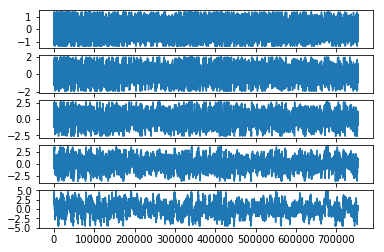

In [4]:
import tools

tools.plot( Y )

Y is 5-dimensional timeseries. From the plot it's clear that Y was generated by a stationary process.

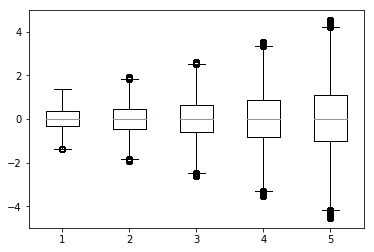

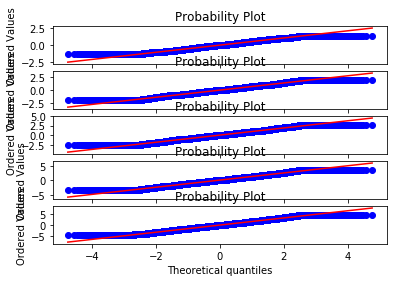

In [5]:
tools.boxplot( Y )
tools.normQQplot( Y )

From boxplot we can see that Y was generated by an almost symmetric distribution with 0 mean and increasing variance over the 5 dimensions of Y. However, normal-QQplot shows that this distribution is not Gaussian. In particular it looks like it is a non-linear transformation of a Gaussian distribution (a min-max transformation around the 99-percentile). For this reason, probably a linear regression model, with Gaussian noise is not well suited for our data.

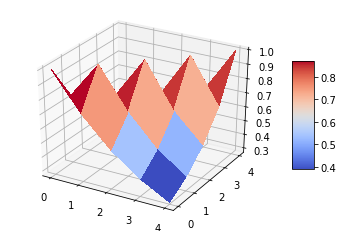

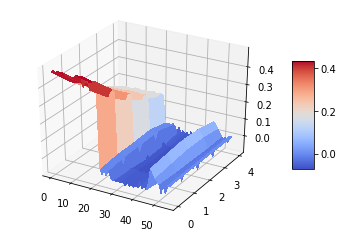

In [6]:
tools.corrsurf( Y, Y )
tools.corrsurf( X, Y )

Correlation surface of Y shows that there is high correlation between the 5 timeseries. For this reason we would prefer to fit one multivariate model, rather then 5 univariate models, to catch this reletionship betweens data. Moreover linear correlation between Y and X is not particulary high, especially for X[:,20] to X[:,56]. 
Once more, this suggests us to fit a non-linear multivariate model to our dataset.

Model Selection

Graphical exploratory analysis suggests us to fit a multivariate non-linear model to our data. However, it's often useful to have a simple benchmark model to verify the quality of more complex models. For this reason we will fit a simple linear regression (with L1 penalization, i.e., Lasso model) to our data and we will use it as our benchmark model.